In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
import glob
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import ResNet50
from keras.applications import MobileNet
from keras.applications import VGG16
from keras.preprocessing import image
from keras.applications.resnet_v2 import preprocess_input
from keras.applications.mobilenet import preprocess_input
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras import regularizers

Using TensorFlow backend.
C:\Users\yotam hermon\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\yotam hermon\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\yotam hermon\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\yotam hermon\Anacond

In [2]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

In [3]:
config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 8} ) 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

In [4]:
def validation(model, train_datagen):
    #model=Model(inputs=base_model.input,outputs=preds)
    #model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
    val_generator=train_datagen.flow_from_directory('../data/validation/', # this is where you specify the path to the main data folder
                                                     target_size=(224,224),
                                                     color_mode='rgb',
                                                     batch_size=16,
                                                     class_mode='categorical',                                                 
                                                     shuffle=True)

    step_size_val=val_generator.n//val_generator.batch_size
    history1 = model.fit_generator(generator=val_generator,
                       steps_per_epoch=step_size_val,
                       epochs=5)
    return history1

In [5]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(6,activation='softmax')(x) #final layer with softmax activation

C:\Users\yotam hermon\Anaconda3\envs\py36\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [6]:
model=Model(inputs=base_model.input,outputs=preds)

In [7]:
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [8]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('../Data_for_TIMIT/Train/', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',                                                 
                                                 shuffle=True)

Found 18000 images belonging to 6 classes.


In [9]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
history = model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=5)


Epoch 1/5
562/562 [==============================] - 65s 116ms/step - loss: 0.4125 - accuracy: 0.8505
Epoch 2/5
562/562 [==============================] - 62s 110ms/step - loss: 0.2733 - accuracy: 0.9013
Epoch 3/5
562/562 [==============================] - 62s 111ms/step - loss: 0.2388 - accuracy: 0.9106
Epoch 4/5
562/562 [==============================] - 62s 111ms/step - loss: 0.2209 - accuracy: 0.9187
Epoch 5/5
562/562 [==============================] - 62s 111ms/step - loss: 0.1937 - accuracy: 0.9269


In [10]:
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(2,activation='softmax',activity_regularizer=regularizers.l2(1e-5))(x) #final layer with softmax activation

model_tiktalk=Model(inputs=model.input,outputs=preds)

for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True
    
train_datagen_tiktalk=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator_tiktalk=train_datagen_tiktalk.flow_from_directory('../data/train/classification/', # this is where you specify the path to the main data folder
                                                                         target_size=(224,224),
                                                                         color_mode='rgb',
                                                                         batch_size=32,
                                                                         class_mode='categorical',                                                 
                                                                         shuffle=True)

Found 2970 images belonging to 2 classes.


In [11]:
model_tiktalk.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train_tiktalk=train_generator_tiktalk.n//train_generator_tiktalk.batch_size
history_tiktalk = model_tiktalk.fit_generator(generator=train_generator_tiktalk,
                                                       steps_per_epoch=step_size_train_tiktalk,
                                                       epochs=5)

Epoch 1/5
92/92 [==============================] - 12s 131ms/step - loss: 0.4545 - accuracy: 0.8291
Epoch 2/5
92/92 [==============================] - 10s 111ms/step - loss: 0.3508 - accuracy: 0.8404
Epoch 3/5
92/92 [==============================] - 10s 111ms/step - loss: 0.3181 - accuracy: 0.8462
Epoch 4/5
92/92 [==============================] - 10s 111ms/step - loss: 0.2572 - accuracy: 0.8877
Epoch 5/5
92/92 [==============================] - 10s 111ms/step - loss: 0.2080 - accuracy: 0.9100


In [12]:
history1_tiktalk = validation(model_tiktalk,train_datagen_tiktalk)

Found 120 images belonging to 2 classes.
Epoch 1/5
7/7 [==============================] - 1s 103ms/step - loss: 1.0936 - accuracy: 0.6154
Epoch 2/5
7/7 [==============================] - 0s 61ms/step - loss: 0.6382 - accuracy: 0.6923
Epoch 3/5
7/7 [==============================] - 0s 63ms/step - loss: 0.5376 - accuracy: 0.6875
Epoch 4/5
7/7 [==============================] - 0s 63ms/step - loss: 0.3991 - accuracy: 0.8462
Epoch 5/5
7/7 [==============================] - 0s 60ms/step - loss: 0.2192 - accuracy: 0.9231


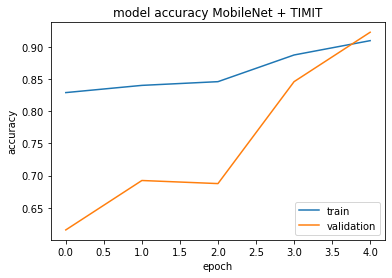

In [13]:
plt.plot(history_tiktalk.history['accuracy'])
plt.plot(history1_tiktalk.history['accuracy'])
plt.title('model accuracy MobileNet + TIMIT')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

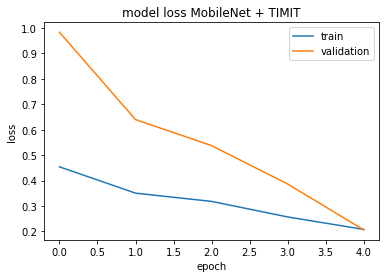

In [14]:
plt.plot(history_tiktalk.history['loss'])
plt.plot(history1_tiktalk.history['loss'])
plt.title('model loss MobileNet + TIMIT')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [15]:
print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128 